In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl    
import seaborn as sns

mpl.rc('font',family='serif')

In [2]:
# get df:
pkl_file = open('/home/simon/Documents/Articles/conflict_prediction/data/computerome/currents/cm_mp_tt.pkl', 'rb')
#pkl_file = open('/home/projects/ku_00017/data/generated/currents/cm_mp_tt.pkl', 'rb')
cm_mp = pickle.load(pkl_file)
pkl_file.close()

for i in list(cm_mp.keys())[-5:]:
    print(f'{i}: {cm_mp[i]}')

ℓ_s: 4.086899155907599
η_s: 0.3216516776984934
ℓ_l: 122.38099367255643
η_l: 0.5042764133322413
σ: 0.7966508853996173


ℓ_s: 4.086899155907599
η_s: 0.3216516776984934
ℓ_l: 122.38099367255643
η_l: 0.5042764133322413
σ: 0.7966508853996173


In [3]:
# get df:
pkl_file = open('/home/simon/Documents/Articles/conflict_prediction/data/computerome/currents/sce_mp_tt.pkl', 'rb')
#pkl_file = open('/home/projects/ku_00017/data/generated/currents/cm_mp_tt.pkl', 'rb')
sce_mp = pickle.load(pkl_file)
pkl_file.close()

for i in list(sce_mp.keys())[-3:]:
    print(f'{i}: {sce_mp[i]}')

ℓ: 0.7152543884319333
η: 0.02709135820928859
σ: 0.11397049713647742


In [4]:
# get df:
pkl_file = open('/home/simon/Documents/Articles/conflict_prediction/data/computerome/currents/dce_mp_tt.pkl', 'rb')
#pkl_file = open('/home/projects/ku_00017/data/generated/currents/cm_mp_tt.pkl', 'rb')
dce_mp = pickle.load(pkl_file)
pkl_file.close()

for i in list(dce_mp.keys())[-5:]:
    print(f'{i}: {dce_mp[i]}')

ℓ_s: 7.168028601364549
η_s: 0.03973329830833181
ℓ_l: 74.72081215227679
η_l: 0.07890380811738884
σ: 0.05555267289265446


In [5]:
# get df:
pkl_file = open('/home/simon/Documents/Articles/conflict_prediction/data/computerome/currents/preds_df_tt.pkl', 'rb')
#pkl_file = open('/home/projects/ku_00017/data/generated/currents/rf_selected_features.pkl', 'rb')
df = pickle.load(pkl_file)
pkl_file.close()

df.sample(6)

,dce_mu,dce_mu_s,dce_mu_l,dce_var,dce_var_s,dce_var_l,X,id,pg_id,train,...,y,cm_mu_slope,cm_mu_acc,cm_mu_mass,cm_mu_s_slope,cm_mu_s_acc,cm_mu_s_mass,cm_mu_l_slope,cm_mu_l_acc,cm_mu_l_mass
2397708,1.203651e-06,1.786893e-06,-5.832413e-07,0.000365,0.000802,0.000550,133,122566357,153060,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3490778,1.135590e-05,-7.966261e-05,9.101851e-05,0.000363,0.000626,0.000334,195,136173111,176781,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1552147,-6.066761e-06,3.864287e-05,-4.470963e-05,0.000363,0.000618,0.000324,284,116815136,138648,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162348,8.564870e-05,-7.421930e-04,8.278417e-04,0.000363,0.000626,0.000334,181,99565273,91864,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2660880,1.672786e-07,-7.204138e-07,8.876924e-07,0.000363,0.000622,0.000329,217,124976761,158101,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1020040,1.131383e-03,-2.373305e-03,3.504689e-03,0.000365,0.000729,0.000463,401,111177137,123559,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Temporal patterns

In [6]:
def get_adj(top_n):

    top_coord = df[df['pg_id'] == top_n[0]][['xcoord', 'ycoord']].iloc[0].values

    step = 0.5
    m_top_coord = top_coord - step
    p_top_coord = top_coord + step

    top_coord_adj = np.stack([top_coord, m_top_coord, p_top_coord])

    pgs = []

    for i in top_coord_adj[:,0]:
        for j in top_coord_adj[:,1]:

            pg = df[(df['xcoord']==i) & (df['ycoord']==j)]['pg_id']
            
            if len(pg.unique()) > 0:
                pgs.append(pg.unique()[0])
    return(pgs)

In [11]:
def plot_time_lines(pattern = 'cm', mp = cm_mp):

    top_n = df.sort_values('cm_mu', ascending= False)['pg_id'].unique()[:1] # [:1] [1:2],[6:7]
    pgs =  get_adj(top_n)


    colors = sns.color_palette("husl", len(pgs))
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(10,10))
    fig.subplots_adjust(hspace=0.3)

    for i, j in enumerate(pgs):

        # mu
        ax1.plot(df[df['pg_id'] == j]['X'], df[df['pg_id'] == j][pattern + '_mu'], color = colors[i]) 
        ax2.plot(df[df['pg_id'] == j]['X'], df[df['pg_id'] == j][pattern + '_mu_l'], color = colors[i])
        ax3.plot(df[df['pg_id'] == j]['X'], df[df['pg_id'] == j][pattern + '_mu_s'], color = colors[i])
        
        # var        
        ax1.fill_between(df[df['pg_id'] == j]['X'], 
                         df[df['pg_id'] == j][pattern + '_mu'] + 2*df[df['pg_id'] == j][pattern + '_var'], 
                         df[df['pg_id'] == j][pattern + '_mu'] - 2*df[df['pg_id'] == j][pattern + '_var'], 
                         color = colors[i], alpha = 0.2)

        ax2.fill_between(df[df['pg_id'] == j]['X'], 
                         df[df['pg_id'] == j][pattern + '_mu_l'] + 2*df[df['pg_id'] == j][pattern + '_var'], 
                         df[df['pg_id'] == j][pattern + '_mu_l'] - 2*df[df['pg_id'] == j][pattern + '_var'], 
                         color = colors[i], alpha = 0.2)

        ax3.fill_between(df[df['pg_id'] == j]['X'], 
                         df[df['pg_id'] == j][pattern + '_mu_s'] + 2*df[df['pg_id'] == j][pattern + '_var'], 
                         df[df['pg_id'] == j][pattern + '_mu_s'] - 2*df[df['pg_id'] == j][pattern + '_var'], 
                         color = colors[i], alpha = 0.2)
        # obs
        if pattern == 'cm':
            ax1.plot(df[df['pg_id'] == j]['X'], df[df['pg_id'] == j]['y'], 'o', alpha = 0.2, color = colors[i])            
            ax2.plot(df[df['pg_id'] == j]['X'], df[df['pg_id'] == j]['y'], 'o', alpha = 0.2, color = colors[i])
            #ax3.plot(df[df['pg_id'] == j]['X'], df[df['pg_id'] == j]['y'], 'o', alpha = 0.2, color = colors[i])

    # train/test split
    first_test = df[df['train'] == 0]['X'].min()

    ax1.vlines(first_test, df[pattern + '_mu'].min()* 2, df[pattern + '_mu'].max()* 2, linestyle = 'dashed', color = 'gray', label = 'train/test split')
    ax2.vlines(first_test, df[pattern + '_mu_l'].min()* 2, df[pattern + '_mu_l'].max()* 2, linestyle = 'dashed', color = 'gray', label = 'train/test split')
    ax3.vlines(first_test, df[pattern + '_mu_s'].min()* 2, df[pattern + '_mu_s'].max()* 2, linestyle = 'dashed', color = 'gray', label = 'train/test split')
       
    ax1.fill_between(df[df['train'] == 0]['X'].unique(), 
                        df[pattern + '_mu'].min()* 2, 
                        df[pattern + '_mu'].max()* 2, 
                        color = 'lightblue', alpha = 0.2, label = 'test months')

    ax2.fill_between(df[df['train'] == 0]['X'].unique(), 
                        df[pattern + '_mu_l'].min()* 2, 
                        df[pattern + '_mu_l'].max()* 2, 
                        color = 'lightblue', alpha = 0.2, label = 'test months')

    ax3.fill_between(df[df['train'] == 0]['X'].unique(), 
                        df[pattern + '_mu_s'].min()* 2, 
                        df[pattern + '_mu_s'].max()* 2, 
                        color = 'lightblue', alpha = 0.2, label = 'test months')
    
    
    # \ell
    if pattern == 'cm':
        ell_label =  'last obs + $\ell_{cmShort}$'

    elif pattern == 'dce':
        ell_label =  'last obs + $\ell_{dceShort}$'

    last_train = df[df['train'] == 1]['X'].max()
    ax3.vlines(last_train + mp['ℓ_s'], 
               df[pattern + '_mu_s'].min()* 2, 
               df[pattern + '_mu_s'].max()* 2, 
               linestyle = 'dashed', color = 'salmon', alpha = 0.8, label = ell_label)

    #ax3.fill_between(df[df['train'] == 0]['X'].unique(), 
    #                    df[pattern + '_mu_s'].min()* 2, 
    #                    df[pattern + '_mu_s'].max()* 2, 
    #                    color = 'lightblue', alpha = 0.2, label = 'test months')
    
    # mean
    #ax3.hlines(0, df['X'].min(), df['X'].max(), linestyle = 'dashed', color = 'orange', alpha = 0.8)

    # meta
    ax1.legend(fontsize=12, loc = 'upper left')
    ax2.legend(fontsize=12, loc = 'upper left')
    ax3.legend(fontsize=12, loc = 'upper left')

    ax1.set_xlim(df['X'].min(), df['X'].max())
    ax2.set_xlim(df['X'].min(), df['X'].max())
    ax3.set_xlim(df['X'].min(), df['X'].max())

    if pattern == 'cm':
        max_scale = 1.5

    elif pattern == 'dce':
        max_scale = 1

    ax1.set_ylim(df[pattern + '_mu'].min()*1.1, df[pattern + '_mu'].max()*max_scale)
    ax2.set_ylim(df[pattern + '_mu'].min()*1.1, df[pattern + '_mu'].max()*max_scale) # should be visually comparable to mu
    ax3.set_ylim(df[pattern + '_mu_s'].min()*1.5, df[pattern + '_mu_s'].max()*max_scale)

    ax1.set_title('Full Trend', fontsize=12)
    ax2.set_title('Isolated Long Term Trend', fontsize=12)
    ax3.set_title('Isolated Short Term Trend', fontsize=12)

    #ax1.set_xlim(0, 5)
    #ax1.set_xlabel('months', fontsize=12)
    #ax2.set_xlabel('months', fontsize=12)
    ax3.set_xlabel('months', fontsize=12)

    # test
    # ax3.set_xticks(np.arange(df['X'].min(),df['X'].max(),5))

    if pattern == 'cm':
        #ax1.set_ylabel('magnitude', fontsize=12)
        ax2.set_ylabel('magnitude', fontsize=12)
        #ax3.set_ylabel('magnitude', fontsize=12)

    elif pattern == 'dce':
        #ax1.set_ylabel('exposure', fontsize=12)
        ax2.set_ylabel('exposure', fontsize=12)
        #ax3.set_ylabel('exposure', fontsize=12)

    fig_title = f'test_plots/{pattern}_ex.jpg'
    plt.savefig(fig_title, bbox_inches="tight", dpi=300)

    plt.show()
    print(len(pgs))

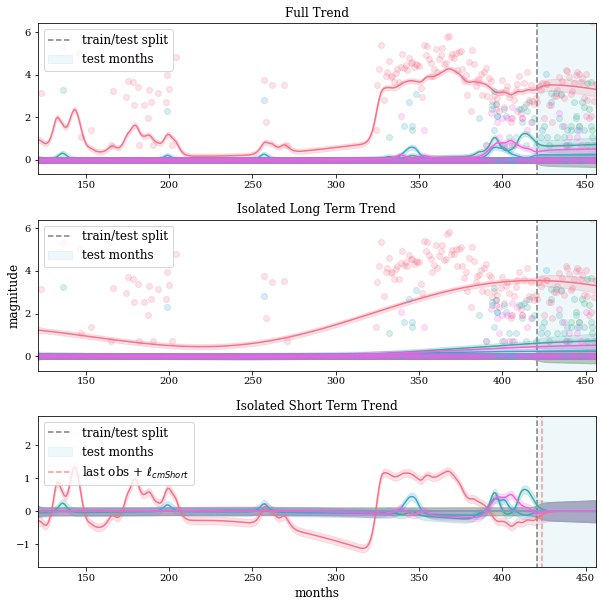

8


In [12]:
plot_time_lines(pattern = 'cm')

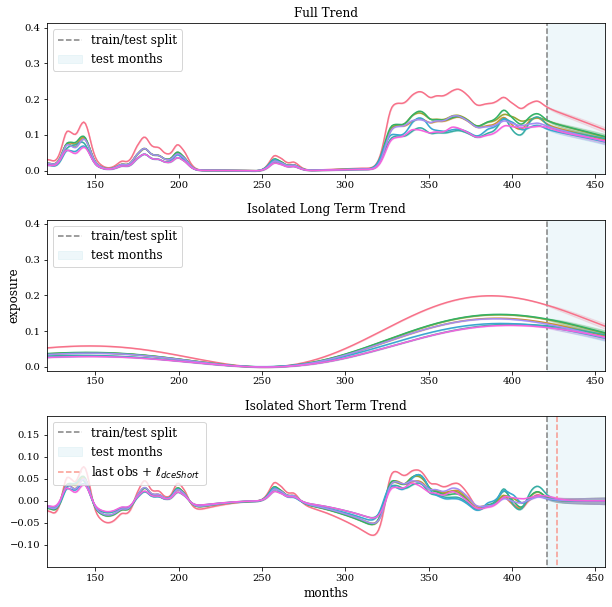

8


In [13]:
plot_time_lines(pattern = 'dce', mp= dce_mp)